<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

In this notebook I will be exploring the european soccer database. This database has more that 25000 matches with over 10,000 players from year 2008 to 2016.
<br>
Download the data from: https://www.kaggle.com/hugomathien/soccer
<br><br></p>


### 0 - Import useful libraries

In [2]:
import sqlite3
import numpy
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%autosave 60

Autosaving every 60 seconds


### 1 -  Read Data from the Database into pandas



In [3]:
# Create your connection.
database = sqlite3.connect('./database.sqlite')

In [4]:
# - how many tables in the database ?
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", database)
tables = tables[1:]
tables

name
1  Player_Attributes
2             Player
3              Match
4             League
5            Country
6               Team
7    Team_Attributes

In [5]:
# - get shape of the tables
print('%-5s %-20s %s' %('s/n','Tables','shape'))
for i,table in enumerate(tables['name'].to_list()):
    df = pd.read_sql_query("SELECT * FROM "+tables['name'].to_list()[i], database)
    print('%-5s %-20s %s' % (i, table,df.shape))

s/n   Tables               shape
0     Player_Attributes    (183978, 42)
1     Player               (11060, 7)
2     Match                (25979, 115)
3     League               (11, 3)
4     Country              (11, 2)
5     Team                 (299, 5)
6     Team_Attributes      (1458, 25)


### Exploration Data Analysis
### 2 - Country and Leagues

In [6]:
# - How many countries ?
df = pd.read_sql_query("SELECT * FROM Country", database)
df

id         name
0       1      Belgium
1    1729      England
2    4769       France
3    7809      Germany
4   10257        Italy
5   13274  Netherlands
6   15722       Poland
7   17642     Portugal
8   19694     Scotland
9   21518        Spain
10  24558  Switzerland

In [7]:
# - How many Leagues
df = pd.read_sql_query("SELECT * FROM League", database)
df

id  country_id                      name
0       1           1    Belgium Jupiler League
1    1729        1729    England Premier League
2    4769        4769            France Ligue 1
3    7809        7809     Germany 1. Bundesliga
4   10257       10257             Italy Serie A
5   13274       13274    Netherlands Eredivisie
6   15722       15722        Poland Ekstraklasa
7   17642       17642  Portugal Liga ZON Sagres
8   19694       19694   Scotland Premier League
9   21518       21518           Spain LIGA BBVA
10  24558       24558  Switzerland Super League

In [8]:
# - Join Country and League
leagues_and_countries = pd.read_sql("""SELECT *
                                    FROM League
                                    JOIN Country ON Country.id = League.country_id;""", database)
leagues_and_countries = leagues_and_countries[['country_id','name']]
leagues_and_countries.columns = ['Country_id','League','Country']
leagues_and_countries

Country_id                    League      Country
0            1    Belgium Jupiler League      Belgium
1         1729    England Premier League      England
2         4769            France Ligue 1       France
3         7809     Germany 1. Bundesliga      Germany
4        10257             Italy Serie A        Italy
5        13274    Netherlands Eredivisie  Netherlands
6        15722        Poland Ekstraklasa       Poland
7        17642  Portugal Liga ZON Sagres     Portugal
8        19694   Scotland Premier League     Scotland
9        21518           Spain LIGA BBVA        Spain
10       24558  Switzerland Super League  Switzerland

**Note :** One league from each country

### 3 - Players

In [9]:
df_players = pd.read_sql_query("SELECT * FROM Player", database)
df_players.head(3)

id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163

In [10]:
# - Round up height values 
df_players[['height']] = (df_players[['height']]).astype(int)
# - convert date of birth to age
df_players[['birthday']] = ((pd.to_datetime('today') - 
                             pd.to_datetime(df_players['birthday']))).astype('<m8[Y]')
df_players.head(3)

id  player_api_id         player_name  player_fifa_api_id  birthday  \
0   1         505942  Aaron Appindangoye              218353      28.0   
1   2         155782     Aaron Cresswell              189615      30.0   
2   3         162549         Aaron Doran              186170      28.0   

   height  weight  
0     182     187  
1     170     146  
2     170     163

In [11]:
# - statistics of birthday, height and weight
df_players[['birthday','height','weight']].describe()

birthday        height        weight
count  11060.000000  11060.000000  11060.000000
mean      32.693128    181.283544    168.380289
std        5.456024      6.341794     14.990217
min       20.000000    157.000000    117.000000
25%       28.000000    177.000000    159.000000
50%       32.000000    182.000000    168.000000
75%       37.000000    185.000000    179.000000
max       53.000000    208.000000    243.000000

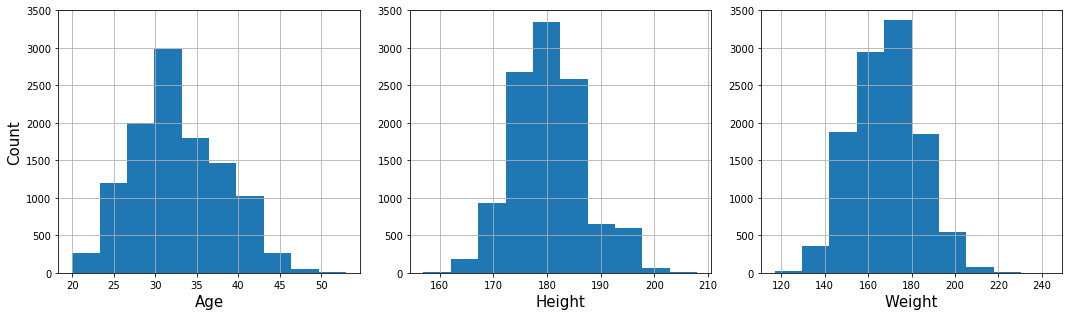

In [12]:
fig, axs = plt.subplots(1,3, figsize=(15, 4.5))
axs = axs.ravel()
plt.setp(axs, ylim=[0,3500])
df_players['birthday'].hist(ax = axs[0]);axs[0].set_xlabel('Age',fontsize=15);
df_players['height'].hist(ax = axs[1]);axs[1].set_xlabel('Height',fontsize=15)
df_players['weight'].hist(ax = axs[2]);axs[2].set_xlabel('Weight',fontsize=15)
axs[0].set_ylabel('Count',fontsize=15)
plt.tight_layout()

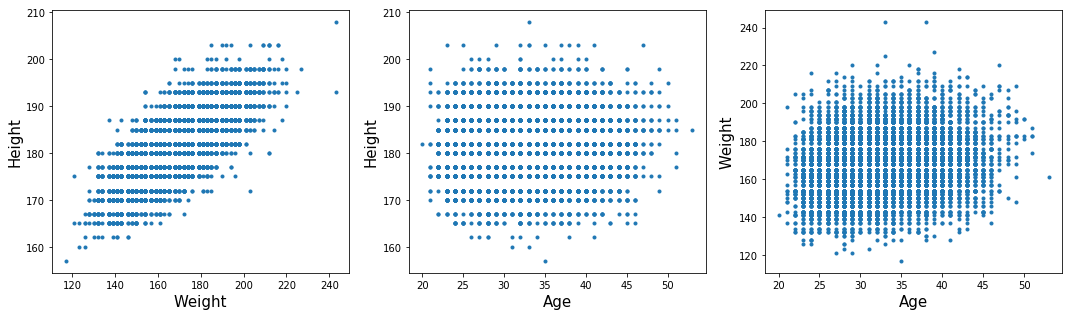

In [13]:
# - What is the relationship between date of birth, height and weight
fig, axs = plt.subplots(1,3, figsize=(15, 4.5))
axs = axs.ravel()
axs[0].plot(df_players['weight'],df_players['height'],'.');
axs[0].set_xlabel('Weight',fontsize=15); axs[0].set_ylabel('Height',fontsize=15)
axs[1].plot(df_players['birthday'],df_players['height'],'.');
axs[1].set_xlabel('Age',fontsize=15); axs[1].set_ylabel('Height',fontsize=15)
axs[2].plot(df_players['birthday'],df_players['weight'],'.');
axs[2].set_xlabel('Age',fontsize=15); axs[2].set_ylabel('Weight',fontsize=15)

#axs[0].set_ylabel('Count',fontsize=15)
plt.tight_layout()

In [14]:
df_player_attr = pd.read_sql_query("SELECT * FROM Player_Attributes", database)
df_player_attr.head(10).T

0                    1  \
id                                     1                    2   
player_fifa_api_id                218353               218353   
player_api_id                     505942               505942   
date                 2016-02-18 00:00:00  2015-11-19 00:00:00   
overall_rating                        67                   67   
potential                             71                   71   
preferred_foot                     right                right   
attacking_work_rate               medium               medium   
defensive_work_rate               medium               medium   
crossing                              49                   49   
finishing                             44                   44   
heading_accuracy                      71                   71   
short_passing                         61                   61   
volleys                               44                   44   
dribbling                             51                   51   
curve                                 45                   45   
free_kick_accuracy                    39                   39   
long_passing                          64                   64   
ball_control                          49                   49   
acceleration                          60                   60   
sprint_speed                          64                   64   
agility                               59                   59   
reactions                             47                   47   
balance                               65                   65   
shot_power                            55                   55   
jumping                               58                   58   
stamina                               54                   54   
strength                              76                   76   
long_shots                            35                   35   
aggression                            71                   71   
interceptions                         70                   70   
positioning                           45                   45   
vision                                54                   54   
penalties                             48                   48   
marking                               65                   65   
standing_tackle                       69                   69   
sliding_tackle                        69                   69   
gk_diving                              6                    6   
gk_handling                           11                   11   
gk_kicking                            10                   10   
gk_positioning                         8                    8   
gk_reflexes                            8                    8   

                                       2                    3  \
id                                     3                    4   
player_fifa_api_id                218353               218353   
player_api_id                     505942               505942   
date                 2015-09-21 00:00:00  2015-03-20 00:00:00   
overall_rating                        62                   61   
potential                             66                   65   
preferred_foot                     right                right   
attacking_work_rate               medium               medium   
defensive_work_rate               medium               medium   
crossing                              49                   48   
finishing                             44                   43   
heading_accuracy                      71                   70   
short_passing                         61                   60   
volleys                               44                   43   
dribbling                             51                   50   
curve                                 45                   44   
free_kick_accuracy                    39                   38   
long_passing                          64                   63   
ball_con

In [15]:
# - Analysis of the players wrt to preferred foot
df_pa_or_right = pd.read_sql_query("""SELECT overall_rating,potential 
                                   FROM Player_Attributes WHERE preferred_foot=='right'""", database)
df_pa_or_left = pd.read_sql_query("""SELECT overall_rating,potential 
                                   FROM Player_Attributes WHERE preferred_foot=='left'""", database)

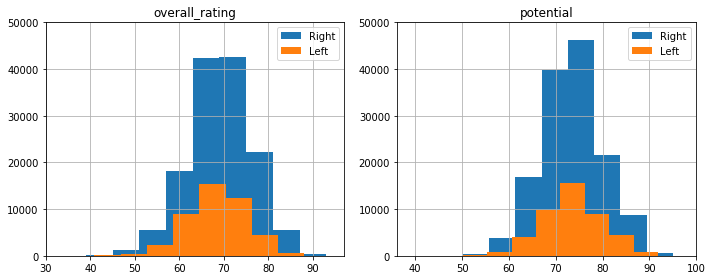

In [16]:
fig, axs = plt.subplots(1,2, figsize=(10, 4))
axs = axs.ravel()
plt.setp(axs, ylim=[0,50000])
df_pa_or_right[['overall_rating']].hist(ax=axs[0],label='Right')
df_pa_or_left[['overall_rating']].hist(ax=axs[0],label='Left')
df_pa_or_right[['potential']].hist(ax=axs[1],label='Right')
df_pa_or_left[['potential']].hist(ax=axs[1],label='Left')
axs[0].legend();axs[1].legend()
fig.tight_layout()

In [26]:
# - consider players attributes with integer values
df_player_attr_int = df_player_attr.select_dtypes(include=['float'])
df_player_attr_int.head(10).T

0     1     2     3     4     5     6     7     8     9
overall_rating      67.0  67.0  62.0  61.0  61.0  74.0  74.0  73.0  73.0  73.0
potential           71.0  71.0  66.0  65.0  65.0  76.0  76.0  75.0  75.0  75.0
crossing            49.0  49.0  49.0  48.0  48.0  80.0  80.0  79.0  79.0  79.0
finishing           44.0  44.0  44.0  43.0  43.0  53.0  53.0  52.0  51.0  51.0
heading_accuracy    71.0  71.0  71.0  70.0  70.0  58.0  58.0  57.0  57.0  57.0
short_passing       61.0  61.0  61.0  60.0  60.0  71.0  71.0  70.0  70.0  70.0
volleys             44.0  44.0  44.0  43.0  43.0  40.0  32.0  29.0  29.0  29.0
dribbling           51.0  51.0  51.0  50.0  50.0  73.0  73.0  71.0  71.0  71.0
curve               45.0  45.0  45.0  44.0  44.0  70.0  70.0  68.0  68.0  68.0
free_kick_accuracy  39.0  39.0  39.0  38.0  38.0  69.0  69.0  69.0  69.0  69.0
long_passing        64.0  64.0  64.0  63.0  63.0  68.0  68.0  68.0  68.0  68.0
ball_control        49.0  49.0  49.0  48.0  48.0  71.0  71.0  70.0  70.0  70.0
acceleration        60.0  60.0  60.0  60.0  60.0  79.0  79.0  79.0  79.0  79.0
sprint_speed        64.0  64.0  64.0  64.0  64.0  78.0  78.0  78.0  78.0  78.0
agility             59.0  59.0  59.0  59.0  59.0  78.0  78.0  78.0  78.0  78.0
reactions           47.0  47.0  47.0  46.0  46.0  67.0  67.0  67.0  67.0  67.0
balance             65.0  65.0  65.0  65.0  65.0  90.0  90.0  90.0  90.0  90.0
shot_power          55.0  55.0  55.0  54.0  54.0  71.0  71.0  71.0  71.0  71.0
jumping             58.0  58.0  58.0  58.0  58.0  85.0  85.0  84.0  84.0  84.0
stamina             54.0  54.0  54.0  54.0  54.0  79.0  79.0  79.0  79.0  79.0
strength            76.0  76.0  76.0  76.0  76.0  56.0  56.0  56.0  56.0  56.0
long_shots          35.0  35.0  35.0  34.0  34.0  62.0  60.0  59.0  58.0  58.0
aggression          71.0  71.0  63.0  62.0  62.0  68.0  68.0  67.0  67.0  67.0
interceptions       70.0  70.0  41.0  40.0  40.0  67.0  67.0  66.0  66.0  66.0
positioning         45.0  45.0  45.0  44.0  44.0  60.0  60.0  58.0  58.0  58.0
vision              54.0  54.0  54.0  53.0  53.0  66.0  66.0  65.0  65.0  65.0
penalties           48.0  48.0  48.0  47.0  47.0  59.0  59.0  59.0  59.0  59.0
marking             65.0  65.0  65.0  62.0  62.0  76.0  76.0  76.0  76.0  76.0
standing_tackle     69.0  69.0  66.0  63.0  63.0  75.0  75.0  75.0  75.0  75.0
sliding_tackle      69.0  69.0  69.0  66.0  66.0  78.0  78.0  78.0  78.0  78.0
gk_diving            6.0   6.0   6.0   5.0   5.0  14.0  14.0  14.0  14.0  14.0
gk_handling         11.0  11.0  11.0  10.0  10.0   7.0   7.0   7.0   7.0   7.0
gk_kicking          10.0  10.0  10.0   9.0   9.0   9.0   9.0   9.0   9.0   9.0
gk_positioning       8.0   8.0   8.0   7.0   7.0   9.0   9.0   9.0   9.0   9.0
gk_reflexes          8.0   8.0   8.0   7.0   7.0  12.0  12.0  12.0  12.0  12.0

In [28]:
df_player_attr_int.columns[1:]

Index(['potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [45]:
# create a list containing Pearson's correlation between 'overall_rating' with each column in cols
correlations_of_players_attributes = [ df_player_attr_int['overall_rating'].corr(df_player_attr_int[attribute]) 
                for attribute in df_player_attr_int.columns[1:] ]

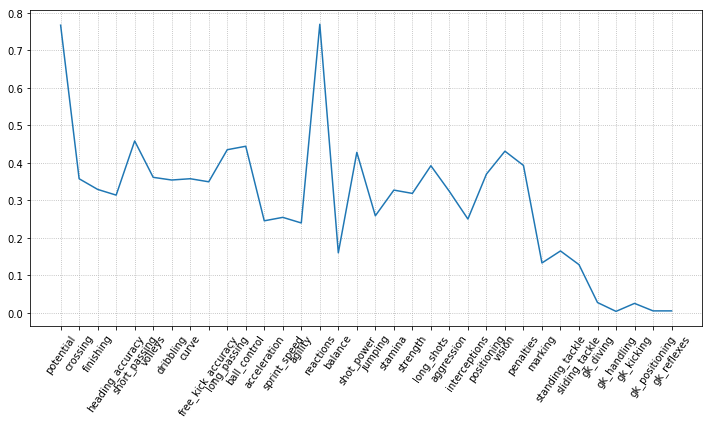

In [46]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(df_player_attr_int.columns[1:],correlations_of_players_attributes)
ax.set_xticklabels(df_player_attr_int.columns[1:], rotation=55)
plt.grid(True,ls='dotted')
plt.title('Pearsons correlation between overall_rating and players attributes')
plt.tight_layout()

## 2.3 Team

In [28]:
df_team = pd.read_sql_query("SELECT * FROM Team", database)
df_team.head(3)

id  team_api_id  team_fifa_api_id    team_long_name team_short_name
0   1         9987             673.0          KRC Genk             GEN
1   2         9993             675.0      Beerschot AC             BAC
2   3        10000           15005.0  SV Zulte-Waregem             ZUL

In [36]:
df_team_attributes = pd.read_sql_query("SELECT * FROM Team_attributes", database)
df_team_attributes.head(5).T

0                    1  \
id                                                1                    2   
team_fifa_api_id                                434                  434   
team_api_id                                    9930                 9930   
date                            2010-02-22 00:00:00  2014-09-19 00:00:00   
buildUpPlaySpeed                                 60                   52   
buildUpPlaySpeedClass                      Balanced             Balanced   
buildUpPlayDribbling                            NaN                   48   
buildUpPlayDribblingClass                    Little               Normal   
buildUpPlayPassing                               50                   56   
buildUpPlayPassingClass                       Mixed                Mixed   
buildUpPlayPositioningClass               Organised            Organised   
chanceCreationPassing                            60                   54   
chanceCreationPassingClass                   Normal               Normal   
chanceCreationCrossing                           65                   63   
chanceCreationCrossingClass                  Normal               Normal   
chanceCreationShooting                           55                   64   
chanceCreationShootingClass                  Normal               Normal   
chanceCreationPositioningClass            Organised            Organised   
defencePressure                                  50                   47   
defencePressureClass                         Medium               Medium   
defenceAggression                                55                   44   
defenceAggressionClass                        Press                Press   
defenceTeamWidth                                 45                   54   
defenceTeamWidthClass                        Normal               Normal   
defenceDefenderLineClass                      Cover                Cover   

                                                  2                    3  \
id                                                3                    4   
team_fifa_api_id                                434                   77   
team_api_id                                    9930                 8485   
date                            2015-09-10 00:00:00  2010-02-22 00:00:00   
buildUpPlaySpeed                                 47                   70   
buildUpPlaySpeedClass                      Balanced                 Fast   
buildUpPlayDribbling                             41                  NaN   
buildUpPlayDribblingClass                    Normal               Little   
buildUpPlayPassing                               54                   70   
buildUpPlayPassingClass                       Mixed                 Long   
buildUpPlayPositioningClass               Organised            Organised   
chanceCreationPassing                            54                   70   
chanceCreationPassingClass                   Normal                Risky   
chanceCreationCrossing                           63                   70   
chanceCreationCrossingClass                  Normal                 Lots   
chanceCreationShooting                           64                   70   
chanceCreationShootingClass                  Normal                 Lots   
chanceCreationPositioningClass            Organised            Organised   
defencePressure                                  47                   60   
defencePressureClass                         Medium               Medium   
defenceAggression                                44                   70   
defenceAggressionClass                        Press               Double   
defenceTeamWidth                                 54                   70   
defenceTeamWidthClass                        Normal                 Wide   
defenceDefenderLineClass                      Cover                Cover   

                                                  4  
id                                        

In [37]:
# - select columns with only integer values
df_team_attributes = df_team_attributes.select_dtypes(include=['int'])
df_team_attributes.head(5).T

0     1     2     3     4
id                         1     2     3     4     5
team_fifa_api_id         434   434   434    77    77
team_api_id             9930  9930  9930  8485  8485
buildUpPlaySpeed          60    52    47    70    47
buildUpPlayPassing        50    56    54    70    52
chanceCreationPassing     60    54    54    70    53
chanceCreationCrossing    65    63    63    70    48
chanceCreationShooting    55    64    64    70    52
defencePressure           50    47    47    60    47
defenceAggression         55    44    44    70    47
defenceTeamWidth          45    54    54    70    52

In [67]:
df_team_attributes = pd.read_sql_query("SELECT * FROM Team_attributes WHERE team_fifa_api_id==434", database)
df_team_attributes.head(5).select_dtypes(include=['int']).T

0     1     2
id                         1     2     3
team_fifa_api_id         434   434   434
team_api_id             9930  9930  9930
buildUpPlaySpeed          60    52    47
buildUpPlayPassing        50    56    54
chanceCreationPassing     60    54    54
chanceCreationCrossing    65    63    63
chanceCreationShooting    55    64    64
defencePressure           50    47    47
defenceAggression         55    44    44
defenceTeamWidth          45    54    54

In [58]:
df_team_attributes.groupby(['team_fifa_api_id']).mean().head(5).T

team_fifa_api_id                  1             2            3            4  \
id                        73.500000     79.500000   175.500000   200.500000   
team_api_id             9825.000000  10252.000000  8655.000000  8559.000000   
buildUpPlaySpeed          52.333333     65.666667    52.500000    54.666667   
buildUpPlayPassing        31.166667     58.666667    63.833333    63.833333   
chanceCreationPassing     34.666667     54.833333    57.000000    59.333333   
chanceCreationCrossing    46.333333     56.000000    56.000000    55.833333   
chanceCreationShooting    46.500000     47.333333    42.000000    49.500000   
defencePressure           50.500000     36.833333    45.666667    40.000000   
defenceAggression         46.500000     48.666667    55.000000    52.833333   
defenceTeamWidth          50.500000     51.166667    46.666667    52.833333   

team_fifa_api_id                  5  
id                       309.500000  
team_api_id             8455.000000  
buildUpPlaySpeed          61.666667  
buildUpPlayPassing        45.000000  
chanceCreationPassing     49.833333  
chanceCreationCrossing    55.166667  
chanceCreationShooting    61.666667  
defencePressure           40.833333  
defenceAggression         50.333333  
defenceTeamWidth          44.833333